# Text Classification Using Multinomial Naive Bayes

In [1]:
#Various models required
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string

### Defining Stop Words

In [2]:
#These are very commonly used words found in all documents and also called as stop words.
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

### Reading data from Dataset Folder and saving in X and Y

In [3]:
#X is a list further made in form of tuple , where first element is name of document and second is the text in documents.
#Y is the category

X  =[] 
Y = []
for category in os.listdir("D:\Coding\ML\TEXT CLASSIFICATION PROJECT\Datasets"):
    for document in os.listdir("D:\Coding\ML\TEXT CLASSIFICATION PROJECT\Datasets/"+category):
        with open("D:\Coding\ML\TEXT CLASSIFICATION PROJECT\Datasets/"+category+'/'+document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)

In [4]:
#DataType of X and Y in detail
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))
print(type(Y))

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>


### Split data into test and train data 

In [5]:
#splitting the data in training and testing
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

In [6]:
#split has done in nearly 3:1 ratio
print(len(x_train))
print(len(x_test))

14997
5000


### Making a dictionary to store the word count of all words occuring in text

In [7]:
#Making Dictionary of words with their corresponding frequency
dic={}

for i in range(len(x_train)):
    # Took [1] because [0] is name of doc and [1] is text in doc
    # word contains the entire text
    word=x_train[i][1].lower()
    
    # splitting the text into words
    # Example "Hey! there, How are you?" is split into ['Hey', 'there', 'How', 'are', 'you', '']
    stripped=re.split(r'\W+',word)
    
    #Iterating over each word
    for s in stripped:
        
        #ignoring stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        
        if s in dic:
            dic[s]+=1
        
        else:
            dic[s]=1

In [8]:
#Sorting the dictionary on basis of frequency of words in descending order
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)

### Plotting a graph (words vs frequency) to choose the top 'k' words

In [9]:
import matplotlib.pyplot as plt

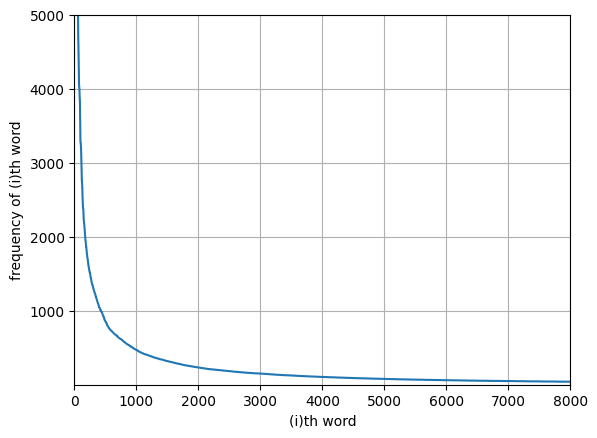

In [10]:
#Plotting graph on no. of words vs frequency 
#On basis of graph we can decide the number of features we want to take
features=sorted_dic
answer1=[] #It will contain the word number
answer2=[] #It will contain the frequency of ith word
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.xlabel("(i)th word")
plt.ylabel("frequency of (i)th word")
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()   

## Using top 3000 words as features

In [11]:
#We decided to take top 3000 words with max freuqency as our feature
#here feature list is answer1
answer1=[features[i][0] for i in range(3000)]

### Making 2D array of number of words occuring in ith text

In [12]:
#Making x_train dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length of answer1(feature list)
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [13]:
#Making x_test dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer1(feature list)
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

### Use inbuilt Multinomial Naive Bayes to make predictions

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [15]:
#Demonstrating confusion-matrix and classification report
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Score on training data: 0.9061145562445823
Score on testing data: 0.8574
[[201   0   0   0   1   0   0   0   2   1   0   0   0   1   0   3   0   2
    0  43]
 [  0 187  12  15   9   8   9   2   2   1   0   0   4   4   0   0   0   0
    0   0]
 [  0   2 211  17   7  19   5   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   1   3 203  25   1   6   0   0   0   0   0   5   0   0   0   0   0
    0   0]
 [  0   1   2  13 208   1   3   0   0   0   0   0   1   0   1   0   0   0
    0   0]
 [  0  22  21   4   5 188   2   0   3   0   0   1   3   0   0   0   0   0
    0   0]
 [  0   0   0   6   3   2 240   5   1   1   0   0   1   0   0   0   0   0
    1   0]
 [  0   0   0   1   0   0   3 210   9   0   1   0   1   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   9   6 237   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   3   0   2 230   6   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   1   3   4 234   0   0   1   0   0   0   0
   

## Result:

The inbuilt Mutinomial Naive Bayes Model gives a score of 0.90 on training data and 0.857 on testing data. Hence, increasing the number of words to 3000 increase the score to some extent and the computational time also increases.